In [371]:
from sklearn.datasets import load_iris, load_diabetes, load_digits, load_wine, load_breast_cancer
import pandas as pd
import numpy as np


TOY_SETS = {'iris' : load_iris,
            'diabates' : load_diabetes,
            'digits': load_digits,
            'wine' : load_wine,
            'breast_cancer' : load_breast_cancer}

PATHS = ['inputs/hotel_bookings.csv']


In [372]:
!pwd

/Users/nils/UNI/misc


In [373]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

def csv_to_df(path):
    return pd.read_csv(path)

In [374]:
TOY_SET_NAME = 'iris'
df = sklearn_to_df(TOY_SETS[TOY_SET_NAME]())
dfs = {name : sklearn_to_df(TOY_SETS[name]()) for name in TOY_SETS.keys()} 

In [375]:
df = csv_to_df(PATHS[0])
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


### Pandas

In [376]:
def one_hot_encode(feat_names, df):
    return pd.get_dummies(data = df, columns = feat_names)

In [377]:
cat_feat_names = ['deposit_type', 'arrival_date_month', 'reservation_status']
one_hot_encode(cat_feat_names, df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,1,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,1,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,1,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,1,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,2,5,2,0.0,...,0,0,0,0,0,0,0,0,1,0
119386,City Hotel,0,102,2017,35,31,2,5,3,0.0,...,0,0,0,0,0,0,0,0,1,0
119387,City Hotel,0,34,2017,35,31,2,5,2,0.0,...,0,0,0,0,0,0,0,0,1,0
119388,City Hotel,0,109,2017,35,31,2,5,2,0.0,...,0,0,0,0,0,0,0,0,1,0


In [378]:
def impute(df, column_to_method):
    '''
    imputes nans in df according to mapping in column to method
    '''
    return df.fillna(column_to_method)

In [379]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [394]:
#Get numeric columns
num_cols = [k for k,v in dict(df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())).items() if v]

In [440]:
num_cols = list(df.select_dtypes(include=['int64','float64']).columns)

In [383]:
#Check number of nonnumeric entries
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().sum())

hotel                                  0
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                     0
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                     0
assigned_room_type                     0
booking_changes                   119390
deposit_type                           0
agent                             103050
company         

In [425]:
len([0 for i in num_cols])

17

In [424]:
len([c for c in num_cols])

17

In [437]:
df['reservation_status_date'].mode()

0    2015-10-21
Name: reservation_status_date, dtype: object

In [441]:
replacement_map = {c:0 for c in num_cols}|{c: df[c].mode().iloc[0] for c in list(set(df.columns) - set(num_cols))}
replacement_map

{'is_canceled': 0,
 'lead_time': 0,
 'arrival_date_year': 0,
 'arrival_date_week_number': 0,
 'arrival_date_day_of_month': 0,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 0,
 'adults': 0,
 'children': 0,
 'babies': 0,
 'is_repeated_guest': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'booking_changes': 0,
 'agent': 0,
 'company': 0,
 'days_in_waiting_list': 0,
 'adr': 0,
 'required_car_parking_spaces': 0,
 'total_of_special_requests': 0,
 'reservation_status_date': '2015-10-21',
 'reservation_status': 'Check-Out',
 'meal': 'BB',
 'reserved_room_type': 'A',
 'distribution_channel': 'TA/TO',
 'hotel': 'City Hotel',
 'customer_type': 'Transient',
 'arrival_date_month': 'August',
 'deposit_type': 'No Deposit',
 'assigned_room_type': 'A',
 'country': 'PRT',
 'market_segment': 'Online TA'}

In [442]:

#replacement_map = {'country' : df.mode(), 'company' : 'None', 'agent' : 'None', 'children' : 0}
impute(df, replacement_map)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,40.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [404]:
num_cols = [k for k,v in dict(df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())).items() if v]
cat_cols = list(set(df.columns) - set(num_cols))
df[num_cols] = df[num_cols].fillna(0) #Fill numeric with zeros
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) #fill categorical with most frequent

In [406]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,40.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
def drop_cols_with_nans(df, threshold):
    '''Drops columns with share of nans greater than threshold
    '''
    return df.dropna(thresh = threshold)

In [13]:
def normalize(df, num_feat_names):
    df[num_feat_names] = (df[num_feat_names] - df[num_feat_names].mean()) / df[num_feat_names].std()
    return df


In [14]:
normalize(df, ['is_canceled','lead_time'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,-0.767037,-0.758086,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,-0.767037,-0.018822,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,-0.767037,-0.655151,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,-0.767037,0.046682,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [15]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,-0.767037,-0.758086,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,-0.767037,-0.018822,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,-0.767037,-0.655151,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,-0.767037,0.046682,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [16]:
def get_categorical(names, df, n_levels = 5):
    pass




In [17]:
###Get summary statistics of df
def get_stats(df):
    return df.describe()

In [18]:
###sort values by column
def sort_values(df, feature_names):
    return df.sort_values(by = feature_names)

In [19]:
#select column

df[feature_names]
#select row slice by index. Default index is 1...n
df[start:end]
#select by value 
df.loc[value] df.loc[index[i:i+n]]
#or row by value
df.loc[value, [column_1, column_2......]]
###apply
df.apply(function)

SyntaxError: invalid syntax (3991820268.py, line 7)

In [ ]:
#select by row names
df[['is_canceled','lead_time','arrival_date_year']]

In [ ]:
#select by slice
start, end = 5, 19
df[start:end]

In [ ]:
#slice and column names
df[['is_canceled','lead_time','arrival_date_year']][start:end]

In [ ]:
#select by value
value = 2015
df.loc[value, ['arrival_date_year']]

In [ ]:
#select by index
index = 5
index_2 = 7
df.iloc[index:index_2]

In [ ]:
#slicing by column index
df.iloc[:, index:index_2]

In [20]:
#boolean indexing
df[df['arrival_date_week_number'] > 52]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3622,Resort Hotel,-0.767037,-0.393133,2015,December,53,27,2,0,2,...,No Deposit,241.0,NaN,0,Transient,33.26,0,0,Check-Out,2015-12-29
3623,Resort Hotel,1.303707,-0.683224,2015,December,53,27,2,0,1,...,No Deposit,250.0,NaN,0,Transient,80.00,0,0,No-Show,2015-12-27
3624,Resort Hotel,-0.767037,-0.393133,2015,December,53,27,2,0,2,...,No Deposit,241.0,NaN,0,Transient,39.26,1,1,Check-Out,2015-12-29
3625,Resort Hotel,1.303707,-0.720655,2015,December,53,27,2,2,2,...,No Deposit,250.0,NaN,0,Transient,75.00,0,1,Canceled,2015-12-22
3626,Resort Hotel,1.303707,-0.196620,2015,December,53,27,2,3,2,...,No Deposit,240.0,NaN,0,Transient,71.28,0,0,Canceled,2015-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104142,City Hotel,-0.767037,-0.814233,2016,December,53,30,2,5,2,...,No Deposit,9.0,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06
104145,City Hotel,-0.767037,0.683010,2016,December,53,30,2,5,0,...,No Deposit,NaN,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06
104147,City Hotel,-0.767037,0.027966,2016,December,53,31,2,5,2,...,No Deposit,28.0,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07
104216,City Hotel,-0.767037,1.927593,2016,December,53,27,2,10,2,...,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08


In [21]:
#transform column based on function
df[['lead_time','arrival_date_day_of_month']].apply(lambda x: np.exp(x))

,lead_time,arrival_date_day_of_month
0,9.272396,2.718282e+00
1,373.665084,2.718282e+00
2,0.403407,2.718282e+00
3,0.426704,2.718282e+00
4,0.430716,2.718282e+00
...,...,...
119385,0.468562,1.068647e+13
119386,0.981354,2.904885e+13
119387,0.519364,2.904885e+13
119388,1.047789,2.904885e+13


In [22]:
###merging
pd.concat([df, df[['lead_time','arrival_date_day_of_month']].apply(lambda x: np.exp(x))]) #stack on top
pd.concat([df, df[['lead_time','arrival_date_day_of_month']].apply(lambda x: np.exp(x))], axis = 1) #stack on side

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time,arrival_date_day_of_month
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,9.272396,2.718282e+00
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,373.665084,2.718282e+00
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.403407,2.718282e+00
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.426704,2.718282e+00
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.430716,2.718282e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,-0.767037,-0.758086,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.468562,1.068647e+13
119386,City Hotel,-0.767037,-0.018822,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.981354,2.904885e+13
119387,City Hotel,-0.767037,-0.655151,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.519364,2.904885e+13
119388,City Hotel,-0.767037,0.046682,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1.047789,2.904885e+13


In [24]:
#group by and apply function
df.groupby('hotel').median()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,-0.767037,-0.280840,2016.0,27.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,91.0,0.0,99.9,0.0,0.0
Resort Hotel,-0.767037,-0.439922,2016.0,28.0,16.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,223.0,0.0,75.0,0.0,0.0


### Sklearn Skeleton

In [82]:
open_ml_dataset_names = ['titanic', 'credit-g', 'liver-disorders', 'cholesterol', 'spambase', 'bodyfat']

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV

In [251]:
from sklearn.datasets import fetch_openml
OPEN_ML_DS_NAME = 'spambase'
#SKLEARN_NAME = 'breast_cancer'
df = sklearn_to_df(fetch_openml(OPEN_ML_DS_NAME, version=1, as_frame=True, return_X_y=False))
#df = dfs[SKLEARN_NAME]

In [252]:
TARGET_NAME = 'target'
FEATURE_NAMES = list(df.columns)
FEATURE_NAMES.remove(TARGET_NAME)
numeric_feature_names = list(df[FEATURE_NAMES].select_dtypes('number').columns)
categoric_feature_names = list( set(df[FEATURE_NAMES].columns) - set(numeric_feature_names))
N_levels = 15
is_classification = len(df[TARGET_NAME].unique()) <= N_levels
is_classification
print(f'{"Regression Problem" if not is_classification else "Classification Problem"}, \
      Target Name: {TARGET_NAME}, Data Set: {OPEN_ML_DS_NAME}')

Classification Problem,       Target Name: target, Data Set: spambase


In [253]:
#Create pipeline
from sklearn import set_config
set_config(display="diagram")
imputer = SimpleImputer()
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'mean')),
                                ('scaler', StandardScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent')),
                                    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))])
preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_feature_names),
                                                 ('categoric', categorical_transformer, categoric_feature_names)]
                                )

estimator = LogisticRegression() if is_classification else LinearRegression()

pipe = Pipeline(steps = [('preprocessing', preprocessor), ('estimator' , estimator)])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['word_freq_make',
                                                   'word_freq_address',
                                                   'word_freq_all',
                                                   'word_freq_3d',
                                                   'word_freq_our',
                                                   'word_freq_over',
                                                   'word_freq_remove',
                                                   'word_freq_internet',
                                                   'word_freq_order',
                                                   'word_freq_mail',
                                                   'word_freq_receive',
                                                   'wo...
                                                   'word_freq_your',
                                                   'word_freq_font',
                                                   'word_freq_000',
                                                   'word_freq_money',
                                                   'word_freq_hp',
                                                   'word_freq_hpl',
                                                   'word_freq_george',
                                                   'word_freq_650',
                                                   'word_freq_lab',
                                                   'word_freq_labs', ...]),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('estimator', LogisticRegression())])

In [254]:
X = df[FEATURE_NAMES]
y = df[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [255]:
from sklearn.metrics import classification_report, plot_roc_curve
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(classification_report(y_test, y_hat)) if is_classification else print (regression_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       822
           1       0.91      0.86      0.89       559

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.91      1381
weighted avg       0.91      0.91      0.91      1381



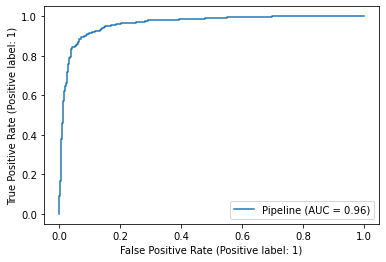

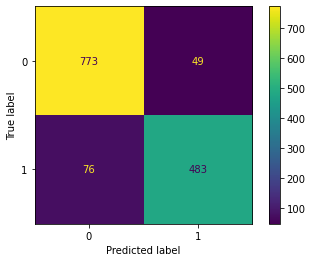

In [256]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
if is_classification and len(y_test.unique()) <= 2:
    RocCurveDisplay.from_estimator(pipe, X_test, y_test)
if is_classification:
    cm = confusion_matrix(y_test, y_hat, labels = pipe.named_steps['estimator'].classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.named_steps['estimator'].classes_).plot()

# Cross Validate

In [257]:
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro', 'accuracy'] if is_classification else ['r2', 'explained_variance',
                                                                         'neg_mean_absolute_error',
                                                                        'neg_mean_absolute_percentage_error']
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe, X, y, scoring=scoring, cv = 10)

In [258]:
score_df = pd.DataFrame(scores)
score_df = pd.concat([score_df, score_df.agg(['mean'])]) 
pd.DataFrame(score_df.loc['mean'])

,mean
fit_time,0.096654
score_time,0.014783
test_precision_macro,0.916083
test_recall_macro,0.910850
test_accuracy,0.917189


# Plotting Feature Importances or Coefficients

In [267]:
if categoric_feature_names != []:
    cat_feature_names_out = pipe.named_steps['preprocessing'].named_transformers_['categoric'].named_steps['encoder'].get_feature_names_out(categoric_feature_names)
feature_names_out = list(set(cat_feature_names_out) | set(numeric_feature_names))
if isinstance(pipe.named_steps['estimator'], LogisticRegression):
    importances = {name : value for name, value in zip(feature_names_out, pipe.named_steps['estimator'].coef_[0])}
if isinstance(pipe.named_steps['estimator'], LinearRegression):
    importances = {name : value for name, value in zip(feature_names_out, pipe.named_steps['estimator'].coef_)}

    
importances = importances if not isinstance(list(importances.values())[0], np.ndarray) else \
                {k : np.mean(v) for k,v in importances.items()}
importances = dict(sorted(importances.items(), key=lambda item: -item[1]))


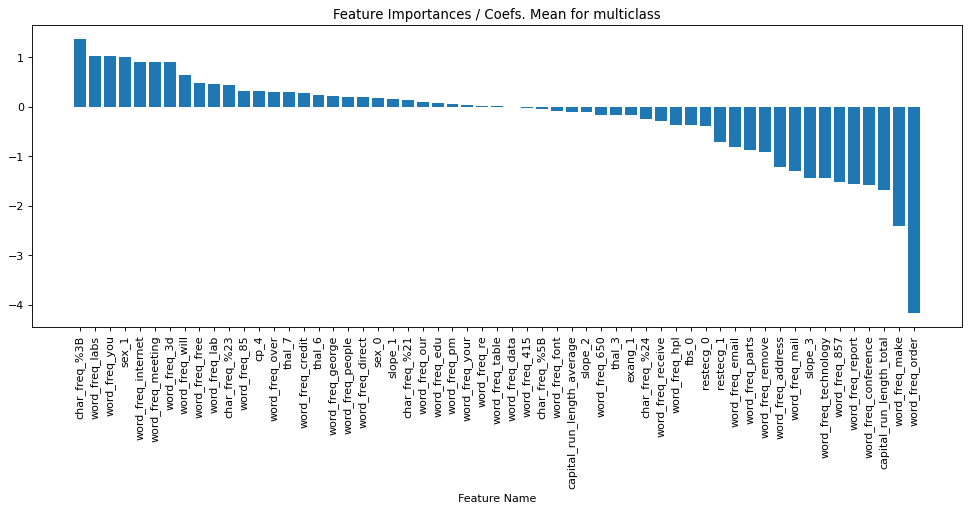

In [268]:
plt.figure(figsize=(15, 5), dpi=80)
plt.bar(range(len(importances)), list(importances.values()), align='center')
plt.xticks(range(len(importances)), list(importances.keys()), rotation = 90)
plt.title('Feature Importances / Coefs. Mean for multiclass')
plt.xlabel('Feature Name')
plt.show()

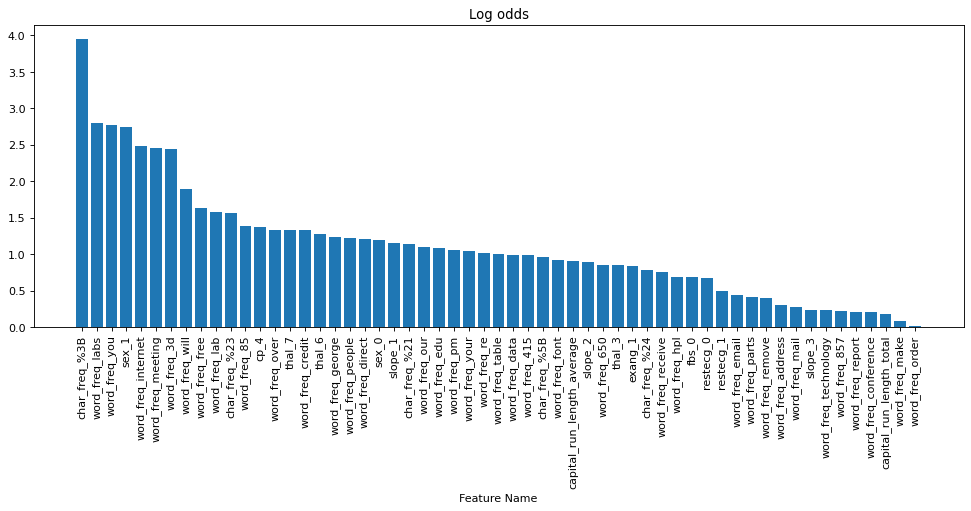

In [269]:
if is_classification:
    plt.figure(figsize=(15, 5), dpi=80)
    plt.bar(range(len(importances)), [np.exp(e) for e in importances.values()], align='center')
    plt.xticks(range(len(importances)), list(importances.keys()), rotation = 90)
    plt.title('Log odds')
    plt.xlabel('Feature Name')
    plt.show()

# Plotting Residuals

In [270]:
from statsmodels.graphics.gofplots import qqplot
if not is_classification:
    residuals = y_hat-y_test
    plt.hist(residuals, bins = 35)
    plt.show()
    plt.plot(np.abs(y_test - y_hat), 'o')
    plt.ylabel('||$\hat{y} - y}$||', fontsize = 10)

# Testing Different Estimators

In [369]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

params_grid_reg = [{'estimator':[LinearRegression()]},{'estimator': [Ridge()],},{'estimator': [ElasticNet()],},
                  {'estimator':[DummyRegressor()]},{'estimator':[SVR()]},{'estimator':[DecisionTreeRegressor()]},
                  {'estimator':[AdaBoostRegressor()]}]

params_grid_class = [{'estimator':[LogisticRegression()]},{'estimator':[DecisionTreeClassifier()]},
                     {'estimator':[AdaBoostClassifier()]}]
class_metrics = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
reg_metrics = ['r2', 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,
                    params_grid_class,
                    scoring = class_metrics if is_classification else reg_metrics,
                    refit = False,
                    cv=5,
                   verbose = True)

In [370]:
results = grid.fit(X_train,y_train)
class_metrics_names = ['param_estimator'] + [f'mean_test_{metric}' for metric in class_metrics]
reg_metrics_names = ['param_estimator'] + [f'mean_test_{metric}' for metric in reg_metrics]
cs = class_metrics_names if is_classification else reg_metrics_names
pd.DataFrame(grid.cv_results_)[cs]

Fitting 5 folds for each of 3 candidates, totalling 15 fits


,param_estimator,mean_test_precision_macro,mean_test_recall_macro,mean_test_accuracy,mean_test_f1_macro
0,LogisticRegression(),0.924989,0.917190,0.925155,0.920619
1,DecisionTreeClassifier(),0.897488,0.898598,0.902795,0.897966
2,AdaBoostClassifier(),0.943727,0.940398,0.945031,0.941970


In [323]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

In [ ]:
###Using sklearn imputer on pandas

import pandas as pd
from sklearn.impute import SimpleImputer
arr = [[1., 'x'], [np.nan, 'y'], [7., 'z'], [7., 'y'], [4., np.nan]]
df1 = pd.DataFrame({'x1': [x[0] for x in arr],
                    'x2': [x[1] for x in arr]},
                  index=[l for l in 'abcde'])
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
print(pd.DataFrame(imp.fit_transform(df1),
                   columns=df1.columns,
                   index=df1.index))
